In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

In [2]:
# Constants
SAMPLES_PER_YEAR = 12 * 24 * 365
LESS_WINDY_IDS = [18880, 18881, 18995, 18997, 18998, 18999, 19110, 19111, 19112, 19113]
MORE_WINDY_IDS = [23769, 23770, 23771, 23903, 23904, 23905, 23906, 23907, 23908, 24046, 24047,
                  24048, 24049, 24050, 24051, 24052, 24053, 24177, 24178, 24179, 24180, 24181]
YEARS = [2007, 2008, 2009]

In [3]:
def concat_csv(folder_from, file_to, site_ids):

    array = np.empty(shape=(0, SAMPLES_PER_YEAR * len(YEARS)))  # size of 3 years of data, with 5min resolution
    
    # For each file in directory folder_from.
    for site_id in site_ids:
        data_year = np.empty(shape=(0,))
        for year in YEARS:
            f = str(site_id) + '-' + str(year) + '.csv'
            filename = os.path.join(folder_from, f)
            print(filename)
            
            # Select only values of interest
            df = pd.read_csv(filename).iloc[3:, 5]
            values = df.values.astype('float')
            
            # Normalize to get values in [0, 1]
            values = values / np.max(values)
            
            # Concatenate only if profile is not all zeros
            if (np.sum(values) > 0.):
                data_year = np.concatenate((data_year, values))
        
        array = np.vstack((array, data_year))

    np.savetxt(file_to, array, delimiter=',')
    return array

def get_16mw(folder_from, site_ids):
    
    site_ids_16mw = []
    
    # For each file in directory folder_from.
    for site_id in site_ids:
        for year in YEARS:
            f = str(site_id) + '-' + str(year) + '.csv'
            filename = os.path.join(folder_from, f)
            #print(filename)
            
            # Select only values of interest
            df = pd.read_csv(filename).iloc[3:, 5]
            values = df.values.astype('float')
            
            # Store max value in time series
            if np.max(values) == 16:
                site_ids_16mw.append(site_id)
    return site_ids_16mw

In [4]:
folder_from = '/Volumes/Eluteng/cs159_data/less_windy/'
mw16_less_windy = get_16mw(folder_from, LESS_WINDY_IDS)
print('Less windy:', mw16_less_windy)

# folder_from2 = '/Volumes/Eluteng/cs159_data/more_windy/'
# mw16_more_windy = get_16mw(folder_from2, MORE_WINDY_IDS)
# print('\n\nMore: windy:', mw16_more_windy)

Less windy: [18880, 18880, 18880, 18881, 18881, 18881, 18995, 18995, 18995, 18997, 18997, 18997, 19110, 19110, 19110, 19111, 19111, 19111, 19112, 19112, 19112, 19113, 19113, 19113]


In [5]:
folder_from = '/Volumes/Eluteng/cs159_data/less_windy/'
file_to = 'generative_models/data/less_windy.csv'
less_windy_array = concat_csv(folder_from, file_to, LESS_WINDY_IDS)

# folder_from2 = '/Volumes/Eluteng/cs159_data/more_windy/'
# file_to2 = 'generative_models/data/more_windy.csv'
# more_windy_array =  concat_csv(folder_from2, file_to2, MORE_WINDY_IDS)

/Volumes/Eluteng/cs159_data/less_windy/18880-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18880-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18880-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18881-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18995-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18997-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18998-2009.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2007.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2008.csv
/Volumes/Eluteng/cs159_data/less_windy/18999-2009.csv
/Volumes/Eluteng/cs159_data/

In [29]:
print(less_windy_array.shape)

(10, 315360)


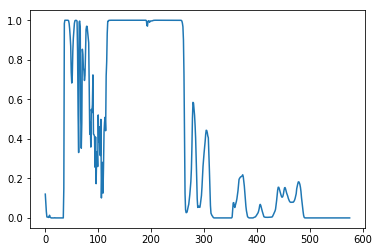

In [23]:
profile = less_windy_array[1, 2*576:3*576]
plt.plot(profile)

In [9]:
24*24

576

In [13]:
def concat_solar(folder_from):
    
    filenames = os.listdir(folder_from)
    
    X = None
    
    # For each file in directory folder_from.
    for file in filenames:
        print(file)
            
        # Select only values of interest
        df = pd.read_csv(filename)
        values = df.values[:, 1].astype('float')
        
        if X is None:
            X = values.reshape((1, values.size))
        else:
            X = np.vstack((X, values))
            
    return X

folder = 'generative_models/data/solar_data_2006/'
file_to = 'generative_models/data/solar_2006.csv'
X_solar = concat_solar(folder)

np.savetxt(file_to, X_solar, delimiter=',')

Actual_33.95_-118.15_2006_DPV_74MW_5_Min.csv
Actual_33.85_-118.25_2006_DPV_74MW_5_Min.csv
Actual_33.85_-117.95_2006_DPV_74MW_5_Min.csv
Actual_33.95_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.85_2006_DPV_74MW_5_Min.csv
Actual_34.05_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.75_-118.35_2006_DPV_74MW_5_Min.csv
Actual_33.55_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.75_-118.25_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.95_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.55_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.85_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.95_-118.45_2006_DPV_74MW_5_Min.csv
Actual_33.95_-118.05_2006_DPV_74MW_5_Min.csv
Actual_33.85_-118.35_2006_DPV_74MW_5_Min.csv
Actual_33.95_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.45_-117.65_2006_DPV_74MW_5_Min.csv
Actual_33.75_-117.75_2006_DPV_74MW_5_Min.csv
Actual_34.05_-117.75_2006_DPV_74MW_5_Min.csv
Actual_33.65_-117.85_2006_DPV_74MW_5_Min.csv
Actual_33.

In [12]:
with open(file_to, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]
rows = np.array(rows, dtype=float)

print(rows.shape)

(32, 105120)


In [15]:
np.max(rows)

65.7